<a href="https://colab.research.google.com/github/flpdias14/Aulas-e-tutoriais/blob/master/Introdu%C3%A7%C3%A3o_Petri_Nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Introdução

#2. Petri Nets: uma visão geral


# 3. Petri Nets e PM4PY

###3.1 Instalando o PM4PY



In [1]:
!pip install pm4py

     |████████████████████████████████| 655kB 8.7MB/s 
     |████████████████████████████████| 40.6MB 104kB/s 
  Created wheel for stringdist: filename=StringDist-1.0.9-cp36-cp36m-linux_x86_64.whl size=24387 sha256=d6eaad8f20e0883ccef76c327ec3b66908fe4a915b4cc30d68f1f072a9e6de3f
  Stored in directory: /root/.cache/pip/wheels/c3/1b/bb/bf0de4d64d8ca38759811fe3353e441f12feb606fb3d1d2e11
  Created wheel for ciso8601: filename=ciso8601-2.1.3-cp36-cp36m-linux_x86_64.whl size=28303 sha256=8f1047f7f8ba7ed4cffb86cca19ed40f06ad9c88de2dfded2cb01091608c83cf
  Stored in directory: /root/.cache/pip/wheels/eb/32/e4/13bdaf7e245f82667b21e0cfb03d21224691a47fa9f9bc80a6
Successfully built stringdist ciso8601


### 3.2 Importando uma Petri Net

As redes de Petri com seus estados transições e arcos bem como sua marcação inicial e final, podem ser importadas/exportadas do formato de arquivo PNML (*Petri Net Markup Language*).

Para isso, temos que primeiro importar o módulo:

In [2]:
from pm4py.objects.petri.importer import importer as pnml_importer

Em seguida, devemos **fazer o upload do arquivo .pnml** contendo o modelo  e, em sequência, **utilizar o método ```apply``` para carregar o modelo:**





In [4]:
net, initial_marking, final_marking = pnml_importer.apply("problem410.pnml")

O método ```apply``` retorna três objetos: um do tipo Petrinet (variável net) e dois objetos do tipo Marking, contendo a marcação inicial e final.

###3.3 Visualizando a Petri Net

Para visualizar a rede que acabamos de importar precisamos importar o módulo ```visualizer```.

In [8]:
from pm4py.visualization.petrinet import visualizer as pn_visualizer

Para gerar a representação gráfica da rede utilizaremos o método ```apply``` do módulo, passando como parâmetros a rede, a marcação inicial e a marcação final. O retorno da função ```apply``` é um gráfico cujo arquivo .png pode ser visualizado com o método ```view```.

In [9]:
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
image = pn_visualizer.view(gviz)
image

'/tmp/tmpqzp5k5n7.gv.png'

Como o colab não suporta a visualização, o arquivo gerado é salvo no diretório acima. Uma vez gerado o arquivo, podemos o vizualizar com o módulo ```Image```. Para isso basta importar:

In [10]:
from IPython.display import Image

E assim:

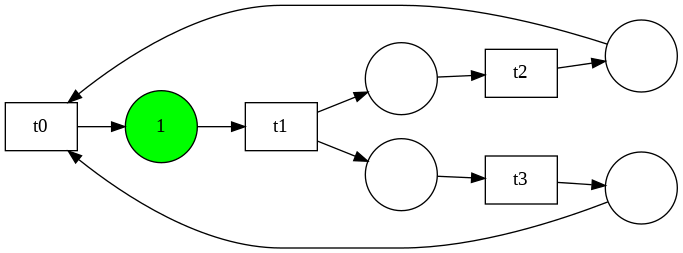

In [11]:
Image(image)

É possível alterar o formato da imagem da rede. Para isso é necessário:

In [ ]:
parameters = {pn_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT:"svg"}

gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters)
pn_visualizer.view(gviz)


Se quisermos salvar a imagem gerada isso pode ser feito com o método ```save```:

In [31]:
pn_visualizer.save(gviz, "alpha.svg")

###3.4 Exportando uma Petri Net

Para exportar uma Petri Net, iremos precisar utilizar o módulo ```exporter```, que pode ser importado da seguinte forma:

In [ ]:
from pm4py.objects.petri.exporter import exporter as pnml_exporter

Utilizando o método ```apply``` , passando como parâmetros a rede, suas marcações e caminho onde o arquivo .pnml deve ser salvo, realizamos a exportação da rede: 

In [ ]:
pnml_exporter.apply(net, initial_marking, "petri.pnml")

##3.5 Propriedades da Rede

Uma vez que já conseguimos importar uma rede, é interessante poder avaliar algumas propriedades da rede. 

Uma propriedade da rede pode ser, por exemplo, se uma transição está habilitada em uma determinada marcação. Além disso, podemos avaliar a lista de estados, transições e arcos.

Para verificar as propriedades da rede no PM4PY, devemos começar importando o módulo ```semantics``` :

In [5]:
from pm4py.objects.petri import semantics

Agora, para obter o conjunto de todas as transições habilitadas para uma dada marcação, basta utilizar o méétodo ```enabled_transitions``` passando como parâmetros a rede e a marcação. Por exemplo: 

In [32]:
transitions = semantics.enabled_transitions(net, initial_marking)
transitions

{t1}

Como vimos no exemplo acima que o método nos retorna um conjunto (tipo set) e que na marcação inicial apenas uma marcação está habilitada (t1).

Ainda é possível obter o conjunto de lugares, transições e arcos da rede: 


In [ ]:
places = net.places
transitions = net.transitions
arcs = net.arcs

Cada lugar da rede possui um nome e um conjunto de arcos de entrada e saída que o conecta às respectivas transições. 

As transições possuem nome, um conjunto de arcos de entrada e saída para os lugares e um label. 

Para visualizarmos todas as entradas de todos os lugares:

In [ ]:
# Percorre o conjunto de lugares
for place in places:
 print("\nPLACE: "+place.name)
 # Percorre o conjunto de arcos de entrada
 for arc in place.in_arcs:
  print(arc.source.name, arc.source.label)

Para visualizarmos todas as saídas de todos os lugares da rede:

In [ ]:
# Percorre o conjunto de lugares
for place in places:
 print("\nPLACE: "+place.name)
 # Percorre o conjunto de arcos de saida
 for arc in place.out_arcs:
  print(arc.target.name)

Podemos verificar se uma transição específica está habilitada utilizando o método ```is_enabled``` do módulo ```semantics```:



In [ ]:
print("initial marking : ", initial_marking)
# Percorre o conjunto de transições
for transition in transitions:
  print("transition", transition.name, "is enabled?", semantics.is_enabled(transition, net, initial_marking))

##3.6 Criando uma Rede de Petri

Aqui mostraremos o código necessário para criar uma rede de Petri utilizando o PM4PY